In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_train = pd.read_csv('/Kaggle/House Prices/train.csv')
raw_test = pd.read_csv('/Kaggle/House Prices/test.csv')

In [3]:
train = raw_train.copy()
test = raw_test.copy()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train = train.drop('Id', axis= 1)
test = test.drop('Id', axis=1)

In [6]:
len(train.columns)

80

In [7]:
def getMissingValue(df):
    missingValue = df.isna().sum()
    missingValue = missingValue[missingValue > 0].sort_values()
    print(missingValue)

In [8]:
getMissingValue(train)

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


In [9]:
getMissingValue(test)

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        15
MasVnrType        16
BsmtFinType2      42
BsmtFinType1      42
BsmtQual          44
BsmtExposure      44
BsmtCond          45
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
GarageYrBlt       78
LotFrontage      227
FireplaceQu      730
Fence           1169
Alley           1352
MiscFeature     1408
PoolQC          1456
dtype: int64


## Deleting columns with many missing values

In [10]:
#train = train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
#test = test.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [11]:
bigMissingCols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
train[bigMissingCols] = train[bigMissingCols].fillna('None')
test[bigMissingCols] = test[bigMissingCols].fillna('None')

In [12]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [13]:
bsmt_num_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
train[bsmt_num_cols] = train[bsmt_num_cols].fillna(0)
test[bsmt_num_cols] = test[bsmt_num_cols].fillna(0)

In [14]:
bsmt_str_cols =  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
train[bsmt_str_cols] = train[bsmt_str_cols].fillna('None')
test[bsmt_str_cols] = test[bsmt_str_cols].fillna('None')

In [15]:
getMissingValue(train)

Electrical        1
MasVnrType        8
MasVnrArea        8
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
LotFrontage     259
FireplaceQu     690
dtype: int64


In [16]:
train = train.dropna(axis=0, subset= ['Electrical'])

##do something for test data

In [17]:
getMissingValue(test)

SaleType          1
GarageArea        1
GarageCars        1
Exterior1st       1
Exterior2nd       1
KitchenQual       1
Functional        2
Utilities         2
MSZoning          4
MasVnrArea       15
MasVnrType       16
GarageType       76
GarageCond       78
GarageYrBlt      78
GarageFinish     78
GarageQual       78
LotFrontage     227
FireplaceQu     730
dtype: int64


In [18]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

train['MasVnrType'] = train['MasVnrType'].fillna('None')
test['MasVnrType'] = test['MasVnrType'].fillna('None')

In [19]:
gar_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
train[gar_str_cols] = train[gar_str_cols].fillna('None')
test[gar_str_cols] = test[gar_str_cols].fillna('None')

In [20]:
gar_num_cols = ['GarageYrBlt', 'GarageCars', 'GarageArea']
train[gar_num_cols] = train[gar_num_cols].fillna(0)
test[gar_num_cols] = test[gar_num_cols].fillna(0)

In [21]:
getMissingValue(train)

LotFrontage    259
FireplaceQu    689
dtype: int64


In [22]:
getMissingValue(test)

Exterior1st      1
Exterior2nd      1
KitchenQual      1
SaleType         1
Utilities        2
Functional       2
MSZoning         4
LotFrontage    227
FireplaceQu    730
dtype: int64


In [23]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

<AxesSubplot:xlabel='LotFrontage', ylabel='Neighborhood'>

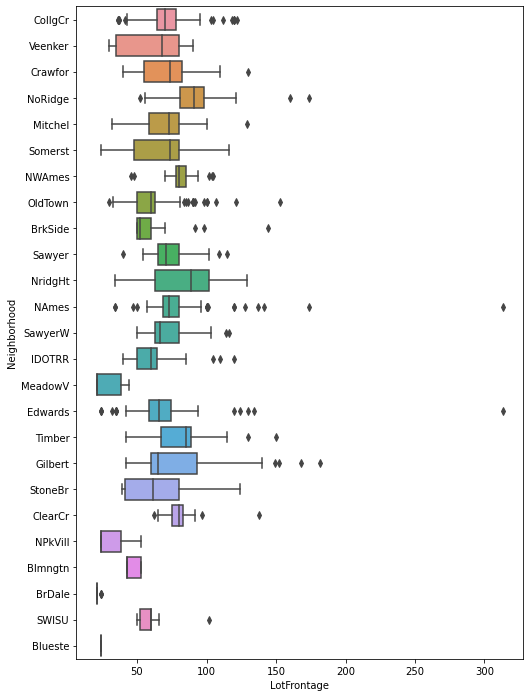

In [24]:
plt.figure(figsize=(8,12))
sns.boxplot(x='LotFrontage',y='Neighborhood',data=train,orient='h')

In [25]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

In [26]:
getMissingValue(train)

Series([], dtype: int64)


In [27]:
getMissingValue(test)

Exterior1st    1
Exterior2nd    1
KitchenQual    1
SaleType       1
Utilities      2
Functional     2
MSZoning       4
dtype: int64


In [28]:
#test.Exterior1st.value_counts()

In [29]:
test['Exterior1st'] = test['Exterior1st'].fillna('None')
test['Exterior2nd'] = test['Exterior2nd'].fillna('None')

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='count'>

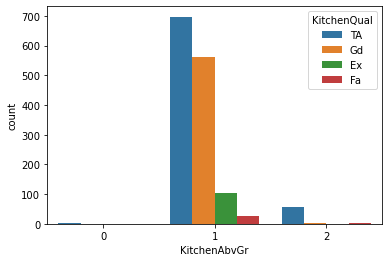

In [30]:
sns.countplot(x=test['KitchenAbvGr'], hue=test['KitchenQual'])

In [31]:
test[test['KitchenQual'].isnull()][['KitchenAbvGr']]

,KitchenAbvGr
95,1


In [32]:
test['KitchenQual'] = test['KitchenQual'].fillna('TA')

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

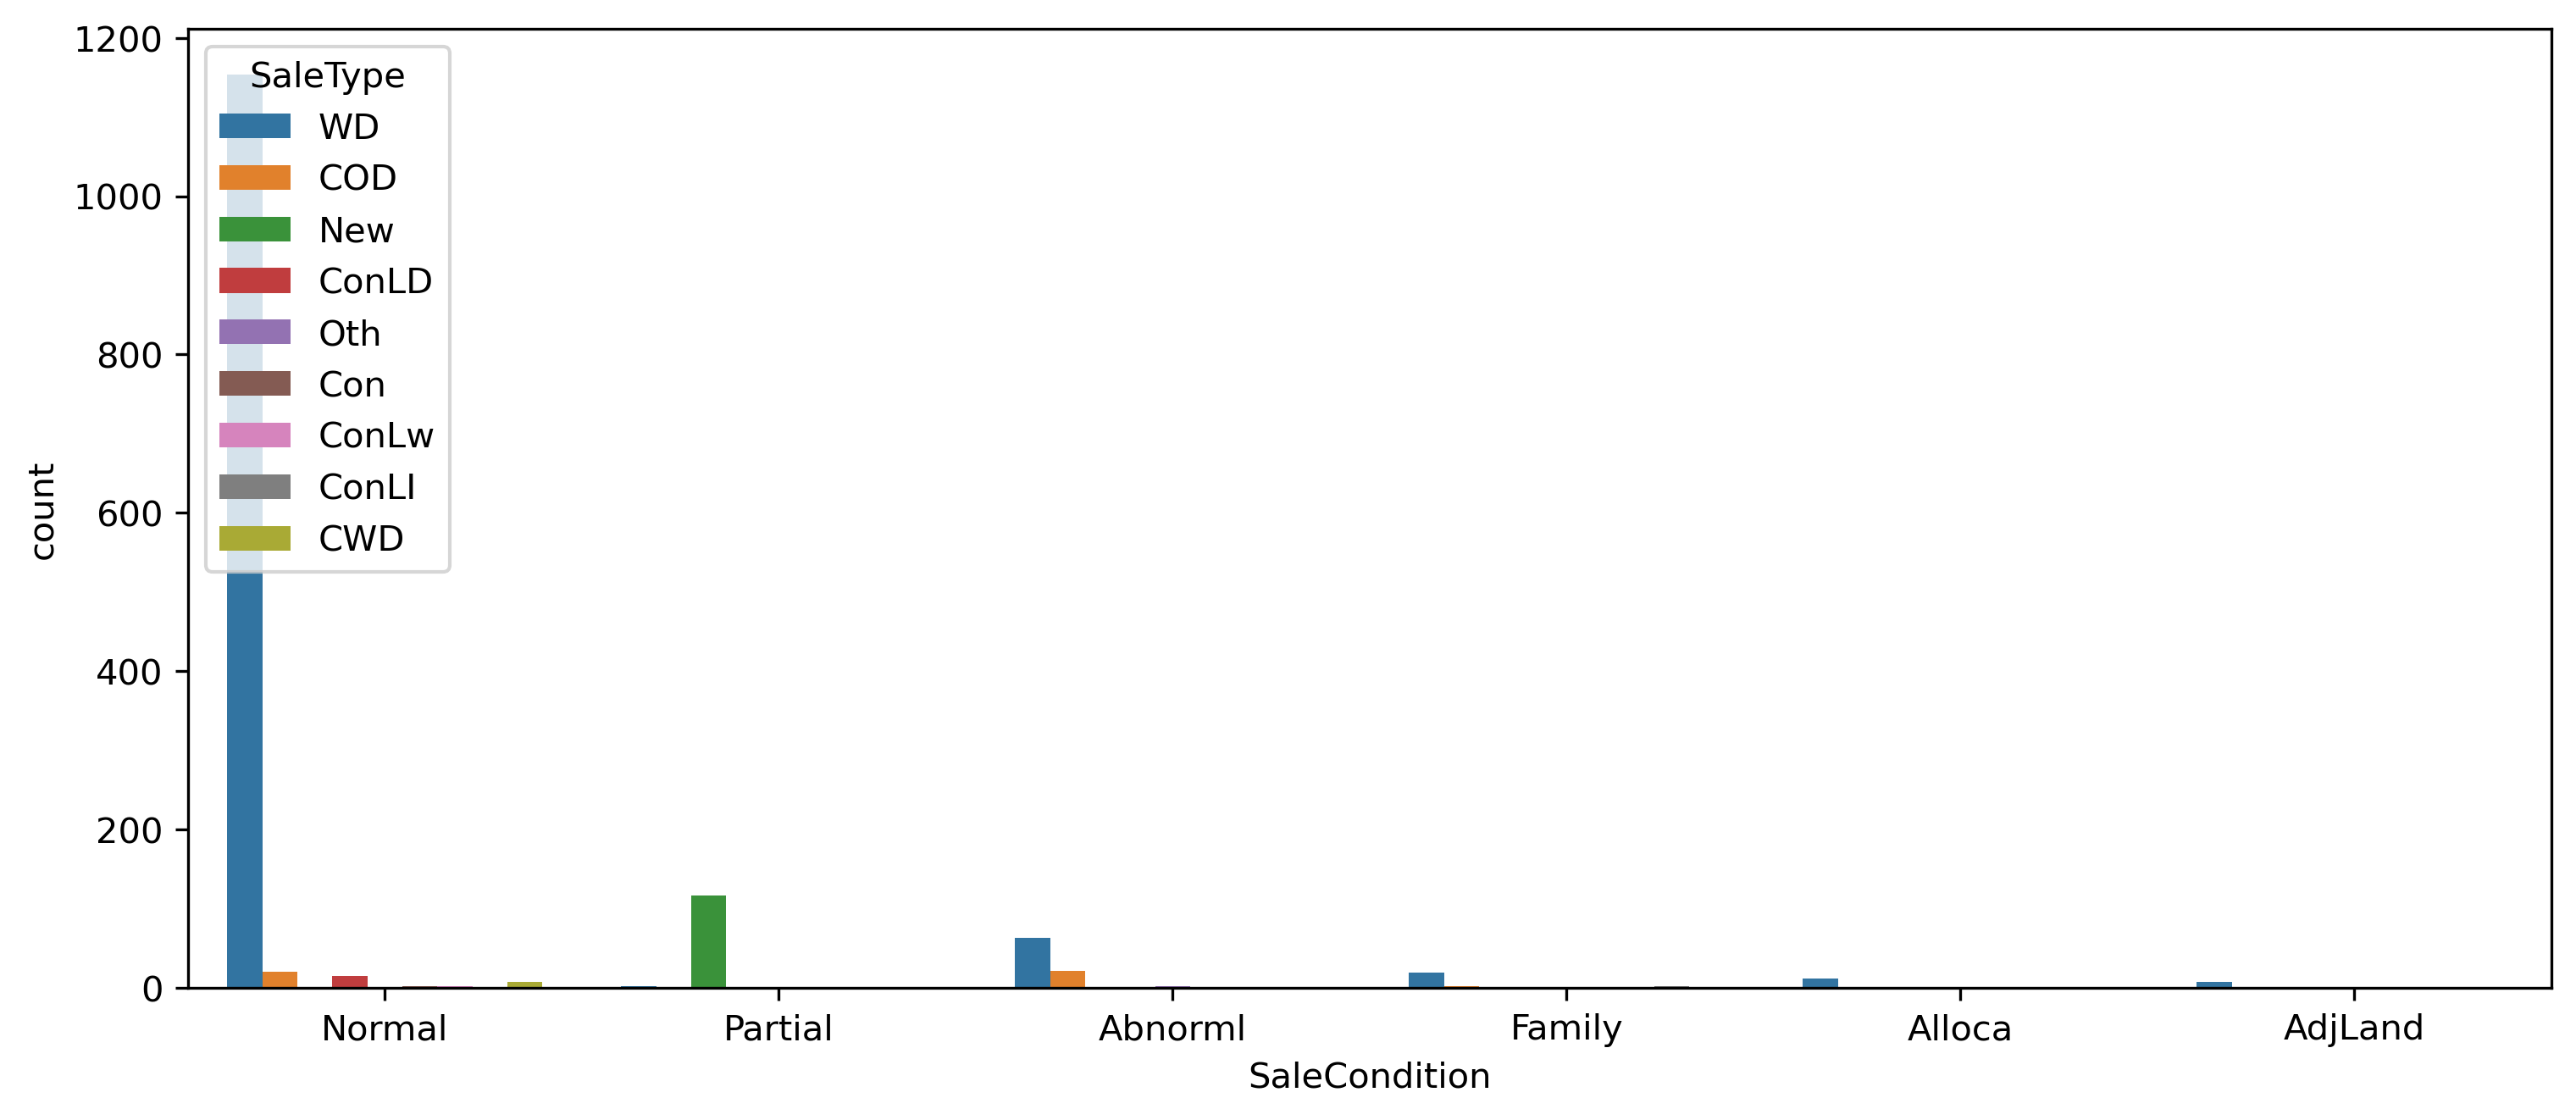

In [33]:
plt.figure(figsize=(12,5), dpi=300)
sns.countplot(x=test['SaleCondition'], hue=test['SaleType'])

In [34]:
test[test['SaleType'].isnull()][['SaleCondition']]

,SaleCondition
1029,Normal


In [35]:
test['SaleType'] = test['SaleType'].fillna('WD')

In [36]:
getMissingValue(train)

Series([], dtype: int64)


<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

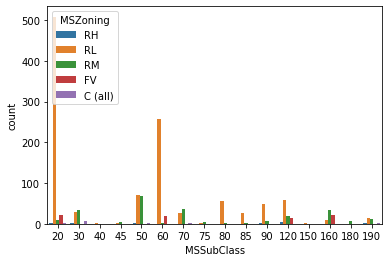

In [37]:
sns.countplot(x=test['MSSubClass'], hue=test['MSZoning'])

In [38]:
test.Utilities.value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [39]:
test['MSZoning'] = test['MSZoning'].fillna('RL')
test['Functional'] = test['Functional'].fillna('RL')
test['Utilities'] = test['Utilities'].fillna('AllPub')

In [40]:
year_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

In [41]:
for feature in year_features:
    train[feature] = train['YrSold'] - train[feature]
    test[feature] = test['YrSold'] - test[feature]

In [42]:
getMissingValue(test)

Series([], dtype: int64)


In [43]:
alpha_cols = train.select_dtypes(exclude=np.number).columns.tolist()

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in alpha_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])
    print(f"{col}: {le.classes_}")

MSZoning: ['C (all)' 'FV' 'RH' 'RL' 'RM']
Street: ['Grvl' 'Pave']
Alley: ['Grvl' 'None' 'Pave']
LotShape: ['IR1' 'IR2' 'IR3' 'Reg']
LandContour: ['Bnk' 'HLS' 'Low' 'Lvl']
Utilities: ['AllPub']
LotConfig: ['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
Condition1: ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
Condition2: ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
HouseStyle: ['1.5Fin' '1.5Unf' '1Story' '2.5Unf' '2Story' 'SFoyer' 'SLvl']
RoofStyle: ['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed']
RoofMatl: ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl']
Exterior1st: ['AsbShng' 'AsphShn' 'BrkComm' 'BrkFace' 'CBlock' 'CemntBd' 'HdBoard'
 'Meta

In [45]:
#train.info()

In [46]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000


In [47]:
train[year_features]

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0
...,...,...,...
1455,8,7,8.0
1456,32,22,32.0
1457,69,4,69.0
1458,60,14,60.0


## Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [53]:
X = train.drop("SalePrice", axis = 1)
y = train['SalePrice']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
param_grid_rf = {"n_estimators": [i for i in range(50, 150, 10)],
              'max_depth': [i for i in range (1, 10, 1)]
             }
    
rf_model = RandomForestRegressor()
grid_rf = GridSearchCV(rf_model,param_grid_rf)

In [54]:
grid_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140]})

In [55]:
grid_rf.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [56]:
preds_rf = grid_rf.predict(X_test)

In [58]:
np.sqrt(mean_squared_error(preds_rf, y_test))

37045.904296601184

In [59]:
submission_new_RF = grid_rf.predict(test)

In [61]:
df_final = pd.DataFrame({'Id': raw_test.Id,
                        'SalePrice': submission_new_RF})
df_final.to_csv('E:\Kaggle\House Prices\Submission_new_RF.csv', index=False)

## Gradient Boost

In [62]:
param_grid1 = {"n_estimators": [i for i in range(120, 200, 5)],
              'max_depth': [i for i in range (1, 5, 1)],
              'alpha': [0.2, 0.4, 0.6, 0.7, 0.8, 0.9]
             }
    
gb_model = GradientBoostingRegressor()
grid_XG = GridSearchCV(gb_model,param_grid1)

In [63]:
grid_XG.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.2, 0.4, 0.6, 0.7, 0.8, 0.9],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [120, 125, 130, 135, 140, 145, 150,
                                          155, 160, 165, 170, 175, 180, 185,
                                          190, 195]})

In [64]:
grid_XG.best_params_

{'alpha': 0.9, 'max_depth': 3, 'n_estimators': 130}

In [65]:
pred_xg = grid_XG.predict(X_test)

In [66]:
np.sqrt(mean_squared_error(pred_xg, y_test))

35357.93106433719

In [67]:
submission_xg = grid_XG.predict(test)

In [69]:
df_final = pd.DataFrame({'Id': raw_test.Id,
                        'SalePrice': submission_xg})
df_final.to_csv('E:\Kaggle\House Prices\Submission_new_XG.csv', index=False)

## KNN

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
param_grid_knn = {"n_neighbors": [i for i in range(1, 80, 2)]}
    
knn_model = KNeighborsRegressor()
grid_knn = GridSearchCV(knn_model,param_grid_knn)

In [55]:
grid_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59, ...]})

In [56]:
grid_knn.best_params_

{'n_neighbors': 5}

In [57]:
pred_knn = grid_knn.predict(X_test)

In [58]:
np.sqrt(mean_squared_error(pred_knn, y_test))

51734.215419018496

## Support Vector Regression

In [59]:
from sklearn.svm import SVR

In [60]:
param_grid_svm = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
    
svm_model = SVR()
grid_svm = GridSearchCV(svm_model,param_grid_svm)

In [61]:
grid_svm.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
                         'gamma': ['auto', 'scale']})

In [62]:
grid_svm.best_params_

{'C': 1000, 'gamma': 'scale'}

In [63]:
preds_svm = grid_svm.predict(X_test)

In [64]:
np.sqrt(mean_squared_error(y_test, preds_svm))

83418.4584041097

In [102]:
submission_svm = grid_svm.predict(test)

In [103]:
df_final = pd.DataFrame({'Id': raw_test.Id,
                        'SalePrice': submission_svm})
df_final.to_csv('E:\Kaggle\House Prices\Submission_new_SVM.csv', index=False)